#📌 Extracción

### 📦 Importar librerías

In [8]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## 🔗 Leer JSON desde la URL

In [9]:
url = 'https://raw.githubusercontent.com/Cesar-Curitol/challenge2-data-science-LATAM-Cesar/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)

if response.status_code == 200:
    datos = pd.read_json(response.text)
    print("✅ Datos cargados correctamente")
else:
    raise Exception(f"❌ Error al cargar datos: {response.status_code}")

✅ Datos cargados correctamente


/tmp/ipython-input-9-3258372304.py:6: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  datos = pd.read_json(response.text)


In [10]:
datos = pd.concat([
    datos[['customerID', 'Churn']],
    pd.json_normalize(datos['customer']),
    pd.json_normalize(datos['phone']),
    pd.json_normalize(datos['internet']),
    pd.json_normalize(datos['account'])
], axis=1)


#🔧 Transformación

##📌 Conocer el conjunto de datos

In [11]:
print("Tipo:", type(datos))
print("Forma:", datos.shape)
print("Columnas:", datos.columns)
print("\nInfo:")
print(datos.info())

Tipo: <class 'pandas.core.frame.DataFrame'>
Forma: (7267, 21)
Columnas: Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 

##📌 Limpieza

In [12]:
datos['Churn'] = datos['Churn'].replace('', pd.NA)
datos = datos.dropna(subset=['Churn'])

##📌 Crear columna "Cuentas_Diarias"

In [13]:
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')
datos['Cuentas_Diarias'] = datos['Charges.Monthly'] / 30


##📌 Estandarización

In [14]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in bin_cols:
    datos[col] = datos[col].map({'Yes': 1, 'No': 0})

datos.rename(columns={
    'tenure': 'TenureMeses',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'
}, inplace=True)


#📊 Carga y análisis

##📌 Análisis descriptivo

In [15]:
datos.describe()


,Churn,SeniorCitizen,Partner,Dependents,TenureMeses,PhoneService,PaperlessBilling,CargoMensual,CargoTotal,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


##📌 Distribución de evasión

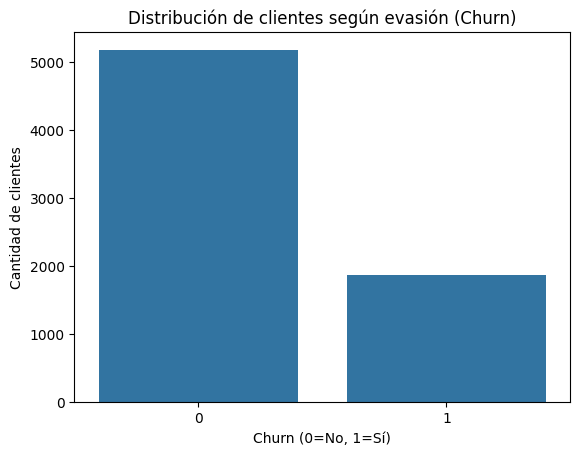

In [16]:
sns.countplot(data=datos, x='Churn')
plt.title("Distribución de clientes según evasión (Churn)")
plt.xlabel("Churn (0=No, 1=Sí)")
plt.ylabel("Cantidad de clientes")
plt.show()


##📌 Evasión por tipo de contrato

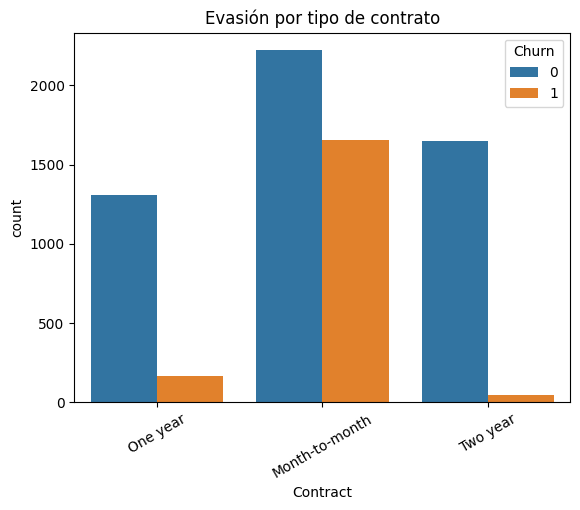

In [17]:
sns.countplot(data=datos, x='Contract', hue='Churn')
plt.title("Evasión por tipo de contrato")
plt.xticks(rotation=30)
plt.show()


##📌 Cargos totales por churn

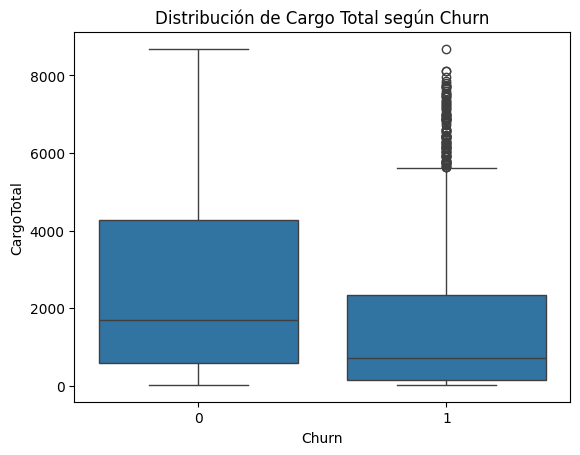

In [18]:
sns.boxplot(data=datos, x='Churn', y='CargoTotal')
plt.title("Distribución de Cargo Total según Churn")
plt.show()


#📄Informe final

In [20]:
from IPython.display import Markdown, display

def generar_informe():
    texto = """
# 📄 Informe Final – Análisis de Evasión de Clientes (Churn)

## 🎯 Introducción

El presente análisis tiene como objetivo identificar patrones asociados a la evasión de clientes (churn) en una compañía de telecomunicaciones. Detectar estos patrones es clave para desarrollar estrategias de retención y fidelización, aumentando la rentabilidad del negocio.

---

## 🧼 Limpieza y Tratamiento de Datos

- Los datos fueron extraídos directamente desde una API pública (repositorio GitHub).
- Se identificaron estructuras anidadas (`customer`, `phone`, `internet`, `account`) que fueron aplanadas para facilitar el análisis.
- Se eliminaron registros con campos vacíos en la columna `Churn`.
- Se convirtieron campos numéricos y se creó la variable **`Cuentas_Diarias`** como derivada del cargo mensual.
- Se estandarizaron valores binarios (`Yes/No` → `1/0`) para su uso en modelos y visualizaciones.
- Columnas clave fueron renombradas para mayor legibilidad: `CargoMensual`, `CargoTotal`, `TenureMeses`.

---

## 📊 Análisis Exploratorio de Datos

### 🔹 Distribución General
- La evasión (`Churn`) muestra una proporción significativa de clientes que abandonan la empresa.
- La variable objetivo fue correctamente binarizada para facilitar segmentación y predicción.

### 🔹 Variables Categóricas
- El tipo de contrato muestra fuerte correlación con churn:
  - **Contratos mensuales** tienen mayor tasa de evasión.
  - **Contratos a largo plazo** muestran mayor fidelización.

### 🔹 Variables Numéricas
- Clientes con **mayor cargo mensual** tienden a mostrar mayor churn.
- Clientes con **mayor tiempo de permanencia** (tenure) son menos propensos a cancelar.

---

## 🔎 Conclusiones e Insights

- **El tipo de contrato es el principal predictor de evasión.**
- **Clientes con cargos elevados y corto tiempo en la compañía son más propensos a cancelar.**
- La mayoría de evasiones se concentran en contratos sin compromiso a largo plazo.

---

## 🧭 Recomendaciones Estratégicas

- **Incentivar contratos anuales o bianuales**, con beneficios adicionales para nuevos clientes.
- **Segmentar campañas de retención** para quienes tienen cargos mensuales altos.
- **Crear alertas preventivas** con modelos predictivos para detectar riesgo de churn.

---

### ✅ Próximo paso sugerido
Entrenar un modelo de clasificación (Logistic Regression, Random Forest, etc.) con estas variables para predecir la evasión y tomar decisiones proactivas.

"""
    display(Markdown(texto))

generar_informe()



# 📄 Informe Final – Análisis de Evasión de Clientes (Churn)

## 🎯 Introducción

El presente análisis tiene como objetivo identificar patrones asociados a la evasión de clientes (churn) en una compañía de telecomunicaciones. Detectar estos patrones es clave para desarrollar estrategias de retención y fidelización, aumentando la rentabilidad del negocio.

---

## 🧼 Limpieza y Tratamiento de Datos

- Los datos fueron extraídos directamente desde una API pública (repositorio GitHub).
- Se identificaron estructuras anidadas (`customer`, `phone`, `internet`, `account`) que fueron aplanadas para facilitar el análisis.
- Se eliminaron registros con campos vacíos en la columna `Churn`.
- Se convirtieron campos numéricos y se creó la variable **`Cuentas_Diarias`** como derivada del cargo mensual.
- Se estandarizaron valores binarios (`Yes/No` → `1/0`) para su uso en modelos y visualizaciones.
- Columnas clave fueron renombradas para mayor legibilidad: `CargoMensual`, `CargoTotal`, `TenureMeses`.

---

## 📊 Análisis Exploratorio de Datos

### 🔹 Distribución General
- La evasión (`Churn`) muestra una proporción significativa de clientes que abandonan la empresa.
- La variable objetivo fue correctamente binarizada para facilitar segmentación y predicción.

### 🔹 Variables Categóricas
- El tipo de contrato muestra fuerte correlación con churn:
  - **Contratos mensuales** tienen mayor tasa de evasión.
  - **Contratos a largo plazo** muestran mayor fidelización.

### 🔹 Variables Numéricas
- Clientes con **mayor cargo mensual** tienden a mostrar mayor churn.
- Clientes con **mayor tiempo de permanencia** (tenure) son menos propensos a cancelar.

---

## 🔎 Conclusiones e Insights

- **El tipo de contrato es el principal predictor de evasión.**
- **Clientes con cargos elevados y corto tiempo en la compañía son más propensos a cancelar.**
- La mayoría de evasiones se concentran en contratos sin compromiso a largo plazo.

---

## 🧭 Recomendaciones Estratégicas

- **Incentivar contratos anuales o bianuales**, con beneficios adicionales para nuevos clientes.
- **Segmentar campañas de retención** para quienes tienen cargos mensuales altos.
- **Crear alertas preventivas** con modelos predictivos para detectar riesgo de churn.

---

### ✅ Próximo paso sugerido
Entrenar un modelo de clasificación (Logistic Regression, Random Forest, etc.) con estas variables para predecir la evasión y tomar decisiones proactivas.

